○ What features did you consider?

     The features considered for the given problem include number of bookmarks, comments created, follow, likes and views for given posts. The correlation of different features with target were analyzed. Since the number of features are smaller in number, there wasn't a need to compress the features.
    
○ What model did you use and why?

    Different models including linear regression(without regularization), lasso regression, k-fold elastic regression were tested on a test dataset with 20% split of data. The linear regression gave a 100% of training and testing accuracy, 100% of r-squared and explained variance metric. The model was doubted to overfit the data and hence other regularization mrthods were used as lasso (99% of r-squared and explained variance), k-fold elastic CV (61% of r-squared and explained variance) with 3-fold cross validation. The lasso model is the most generalizable among all the tested models
    
○ What was your evaluation metric for this?

    The data was preprocessed using Pandas to get count of features as like, follow, etc for the posts and generate labels using given function of 1* VIEW + 4LIKE + 10COMMENT + 25FOLLOW + 100BOOKMARK . The data was split into 80-20 train,test. Evaluation metrics used were testing accuracy, r-squared/explained variance.
    
○ What features would you like to add to the model in the future if you had more time?

    If there was more time to work, I'd like to play around with compressed features and reduce the number of features used through PCA (pricipal component analysis)
    
○ What other things would you want to try before deploying this model in production.

    I'd like to consider the frequency of model calls, latency requirements, computing capabilities and costs to deploy and mantain. I'd also like to think about the results being individually or batch processed. A/B testing on a smaller group for early results before deploying to test with user engagement results against the predictions will also be helpful for more insights.

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/articles-sharing-reading-from-cit-deskdrop/users_interactions.csv
/kaggle/input/articles-sharing-reading-from-cit-deskdrop/shared_articles.csv


In [21]:
import numpy as np # linear algebra
import pandas as pd 

In [22]:
df_sa = pd.read_csv('../input/articles-sharing-reading-from-cit-deskdrop/shared_articles.csv')
df_sa.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [23]:
df_ui = pd.read_csv('../input/articles-sharing-reading-from-cit-deskdrop/users_interactions.csv')
df = df_ui

df['COUNTER'] =1       #initially, set that counter to 1.
group_data = df.groupby(['contentId','eventType'])['COUNTER'].sum().reset_index() #sum function
print(group_data)


                contentId        eventType  COUNTER
0    -9222795471790223670         BOOKMARK        1
1    -9222795471790223670  COMMENT CREATED        2
2    -9222795471790223670           FOLLOW        3
3    -9222795471790223670             LIKE        4
4    -9222795471790223670             VIEW       16
...                   ...              ...      ...
7335  9217155070834564627  COMMENT CREATED        2
7336  9217155070834564627             VIEW       14
7337  9220445660318725468             LIKE        2
7338  9220445660318725468             VIEW       50
7339  9222265156747237864             VIEW        5

[7340 rows x 3 columns]


In [24]:
events_df = group_data.pivot_table('COUNTER', ['contentId'], 'eventType')
events_df = events_df.fillna(0)
events_df

eventType,BOOKMARK,COMMENT CREATED,FOLLOW,LIKE,VIEW
contentId,,,,,
-9222795471790223670,1.0,2.0,3.0,4.0,16.0
-9216926795620865886,1.0,1.0,1.0,3.0,15.0
-9194572880052200111,2.0,1.0,1.0,4.0,21.0
-9192549002213406534,0.0,1.0,0.0,5.0,50.0
-9190737901804729417,0.0,0.0,0.0,1.0,8.0
...,...,...,...,...,...
9213260650272029784,0.0,0.0,0.0,0.0,11.0
9215261273565326920,3.0,0.0,0.0,3.0,24.0
9217155070834564627,0.0,2.0,0.0,0.0,14.0


In [25]:
def label(row):
   return (1* row['VIEW']) + (4*row['LIKE']) + (10*row['COMMENT CREATED']) +( 25*row['FOLLOW'] )+ (100*row['BOOKMARK'])

events_df['label'] = events_df.apply (lambda row: label(row), axis=1)

In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(events_df, test_size=0.2)

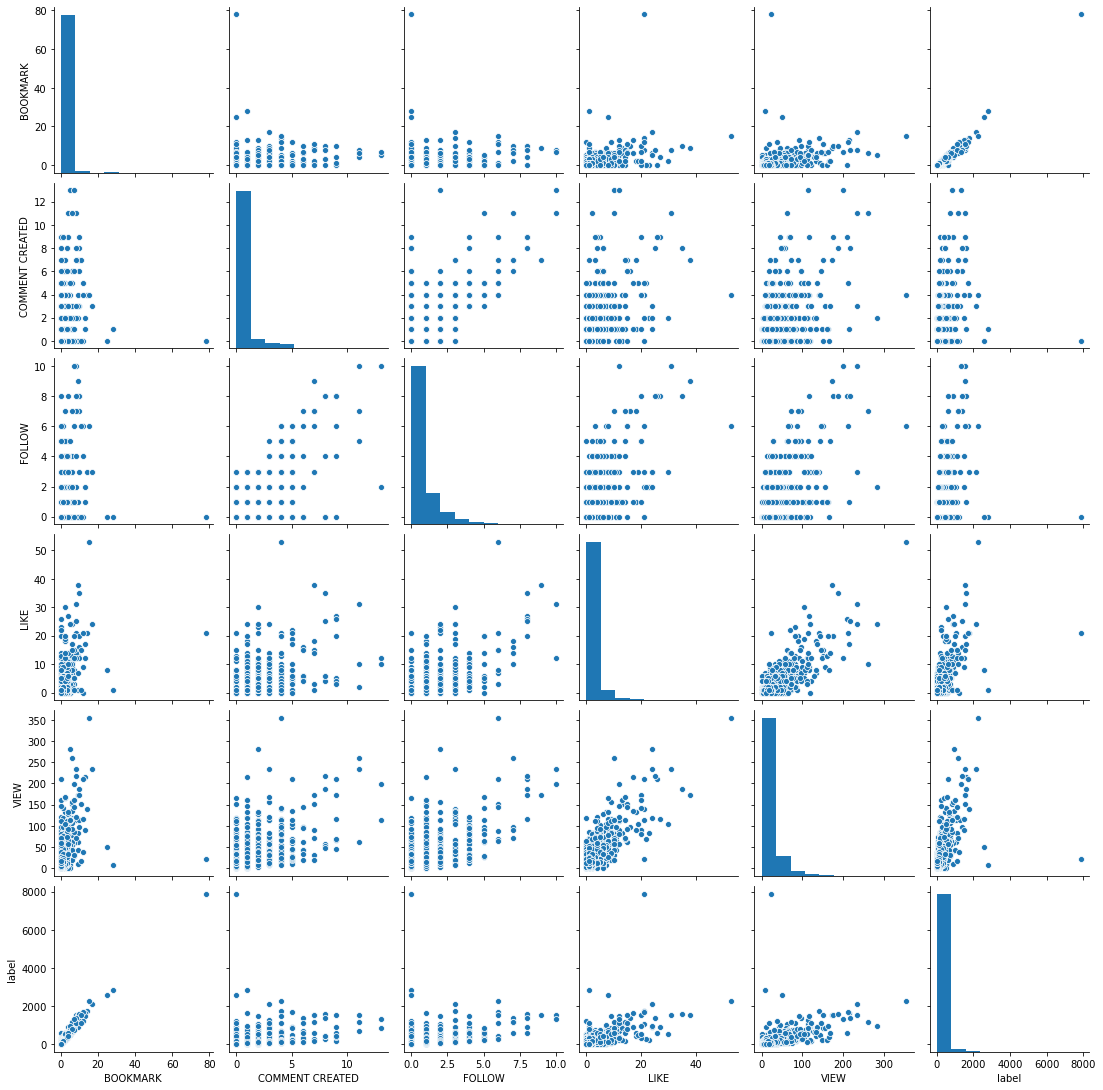

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.pairplot(train)

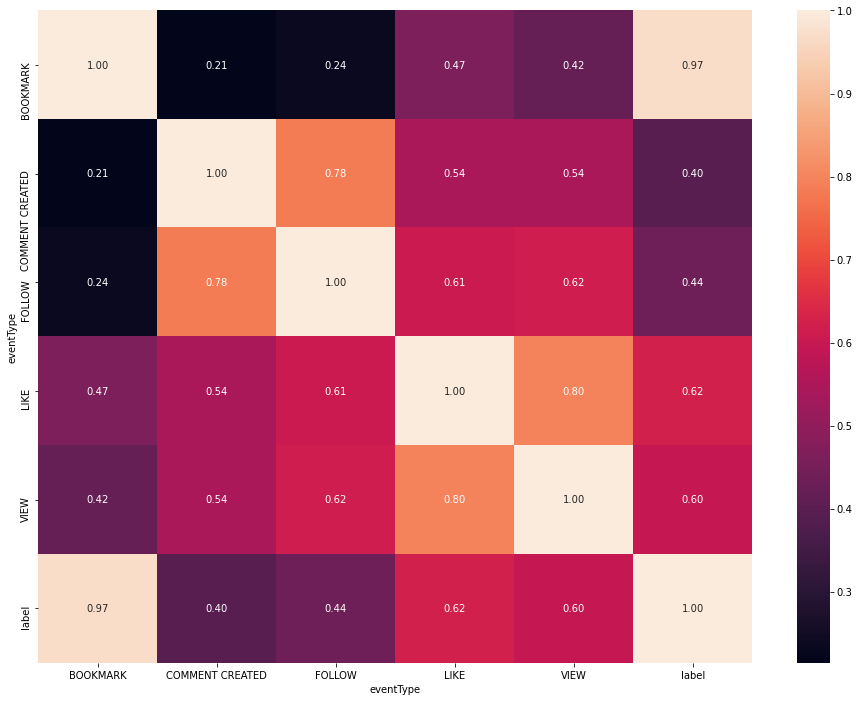

In [29]:
plt.figure(figsize=(16,12))
sns.heatmap(train.corr(),annot=True,fmt=".2f")

In [30]:
train_X, train_Y = train.drop('label',axis = 1), train['label']
test_X, test_Y = test.drop('label',axis = 1), test['label']

In [31]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score


lr = LinearRegression()
lr.fit(train_X,train_Y)
lr.score(train_X,train_Y)
predict_test = lr.predict(test_X)


res = dict()
metrics = dict()

res['lr'] = lr.coef_
metrics['lr'] = r2_score(test_Y, predict_test),explained_variance_score(test_Y,predict_test)

In [32]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(train_X, train_Y)
predict_clf = clf.predict(test_X)
print(clf.coef_)
res['lasso'] = clf.coef_
metrics['lasso'] = r2_score(test_Y, predict_clf),explained_variance_score(test_Y,predict_clf)

[99.97754011  9.99614698 24.86350002  3.99774962  1.00424915]


In [34]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(train_X, train_Y)
ElasticNetCV(cv=3, random_state=0)
print(regr.coef_)
predict_regr = regr.predict(test_X)

res['cv'] = regr.coef_
metrics['cv'] = r2_score(test_Y, predict_regr),explained_variance_score(test_Y,predict_regr)

[49.49451314  3.03307287  2.51285634  9.26400326  2.98242346]


In [35]:
print ("Comparing coefficients of the features with Ground truth : array [100,10,25,4,1]")
for r in res.items():
    print(r)

Comparing coefficients of the features with Ground truth : array [100,10,25,4,1]
('lr', array([100.,  10.,  25.,   4.,   1.]))
('lasso', array([99.97754011,  9.99614698, 24.86350002,  3.99774962,  1.00424915]))
('cv', array([49.49451314,  3.03307287,  2.51285634,  9.26400326,  2.98242346]))


In [36]:
print ("Comparing r2 and explained variance score of models with 1 as max value")
for m in metrics.items():
    print(m)

Comparing r2 and explained variance score of models with 1 as max value
('lr', (1.0, 1.0))
('lasso', (0.9999996270723075, 0.9999996273556891))
('cv', (0.8905660490227614, 0.8907320167810061))


In [37]:
new_post = [2,3,78,4,23]

new_post_f = np.array(new_post).reshape(1,-1)

predict_new_post = clf.predict(new_post_f)
print(predict_new_post)

[2208.38685512]
